In [1]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import math as m
import numpy as np  # 1.7 or higher
from ipywidgets import interactive
from IPython.display import display, Image
from IPython.display import YouTubeVideo


import PIL
from io import BytesIO


import cv2


import qgrid
import pandas as pd

import sympy as sym
sym.init_printing(order="none")
from sympy.vector import CoordSys3D
import sympy.vector as symvec

import scipy
import scipy.constants

sic = scipy.constants

import linear as lin
import quat
import slerp

np.set_printoptions(suppress=True, 
                    formatter={'float_kind':'{:14.4f}'.format})  
%matplotlib inline


def display_img_array(ima):
    im = PIL.Image.fromarray(ima)
    bio = BytesIO()
    im.save(bio, format='png')
    display(Image(bio.getvalue(), format='png'))

def display_image(path):
    pil_im = PIL.Image.open(path)
    display(pil_im)



# embed python variables in latex
# then render with md
lx = lambda c: "$" + sym.latex(c) + "$"


Numpy detected


In [2]:
posedf = pd.read_csv("Pose_est-2024-06-01T14:41:06.457116.csv")
#posedf = posedf[248:285]
tim = posedf['time'].to_numpy()
tim = tim-tim[0]
posedf['time'] = tim
pose_widget = qgrid.show_grid(posedf, 
                            grid_options={'forceFitColumns': False, 'defaultColumnWidth': 100},
                            show_toolbar=True)
display(pose_widget)

#bad rx, ry: 31, 50, 254

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

No such comm: 62638c922ab54e76a07e08fb37e0a416


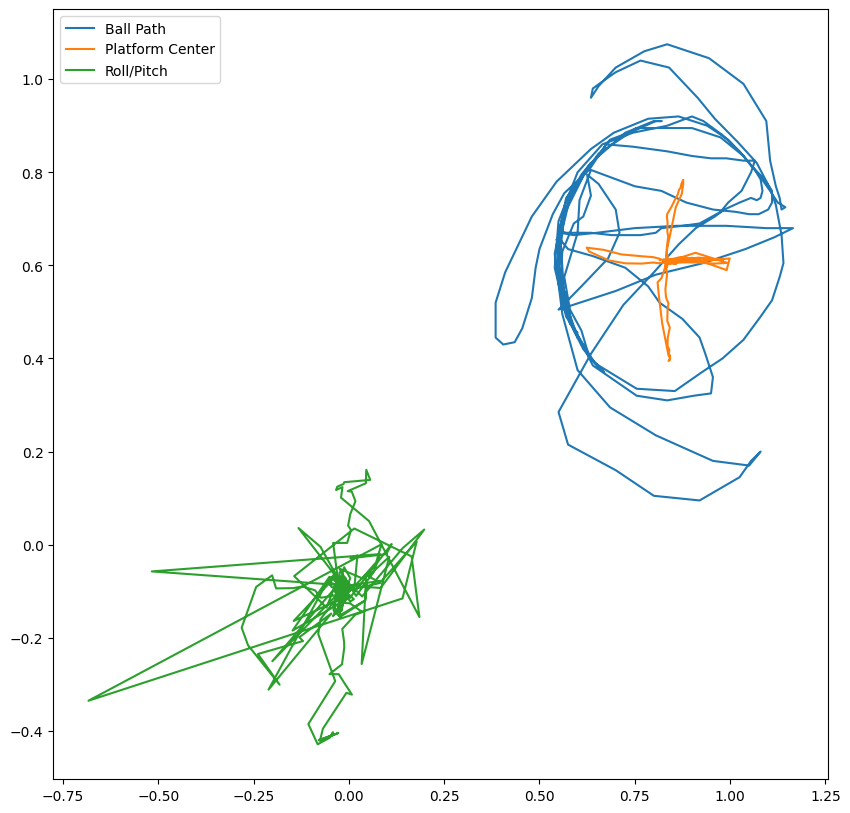

In [3]:
fig, axis = plt.subplots(figsize=(10, 10))
#ax.set_aspect('equal')

#tim = posedf['time'].to_numpy()
#tim = tim-tim[0]
#tim *= 1000

c1x = posedf['c3x'].to_numpy() / 400
c1y = posedf['c3y'].to_numpy() / 400

px = posedf['px'].to_numpy() / 400
py = posedf['py'].to_numpy() / 400

ds2x = posedf['ds2x'].to_numpy() / 100


v2x = posedf['v2x'].to_numpy() / 700
ax = posedf['ax'].to_numpy() / 3000

roll = posedf['roll'].to_numpy() / 36
pitch = posedf['pitch'].to_numpy() / 36

axis.plot(c1x, c1y, label="Ball Path")
axis.plot(px, py, label="Platform Center")
axis.plot(roll, pitch, label="Roll/Pitch")

#axis.set_title("Joystick characterization")
#axis.set_xlabel("Time(ms)")

axis.legend()

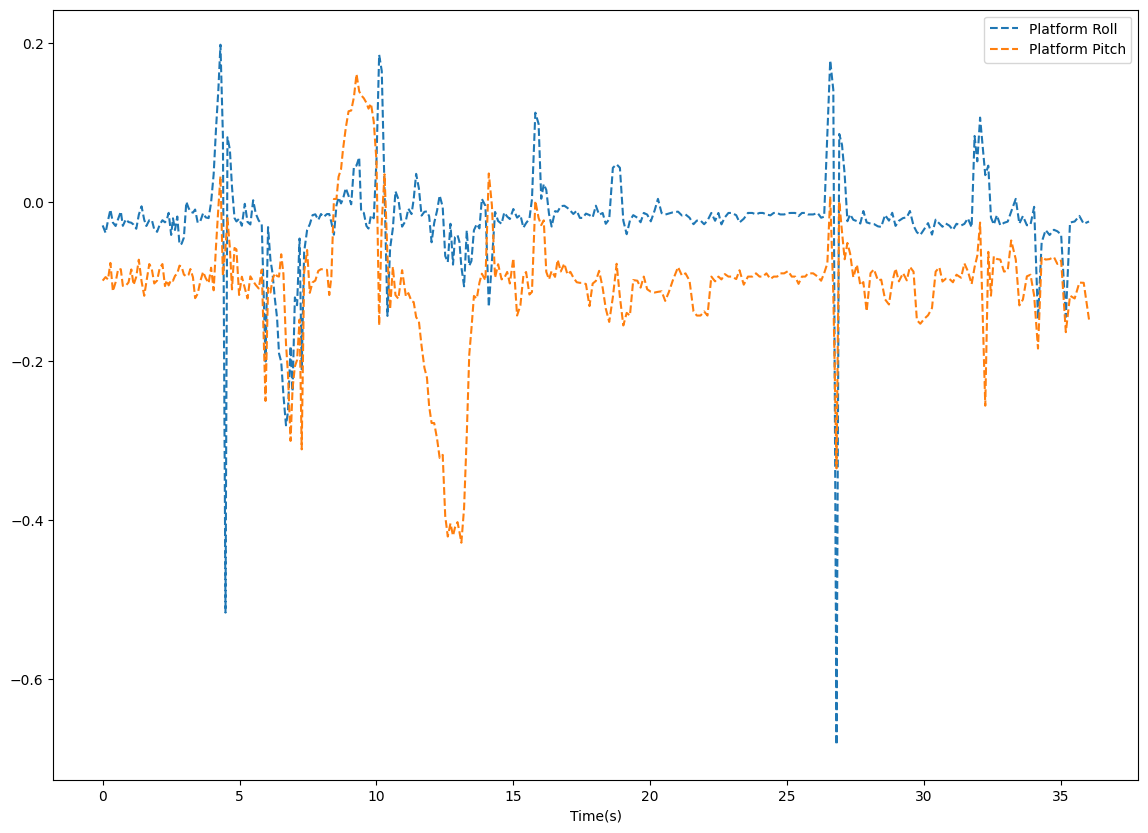

In [4]:
fig, axis = plt.subplots(figsize=(14, 10))

#axis.plot(tim, c1y, 'g-', label="Ball Y")
#axis.plot(tim, c1x, 'b-', label="Ball X")
#axis.plot(tim, px, 'r--', label="Platform Center X")
#axis.plot(tim, py, 'y--', label="Platform Center Y")
#axis.plot(tim, ax, label = "Ball X Accel")
#axis.plot(tim, v2x, label = "Ball X Velocity")
#axis.plot(tim, ds2x, label = "Ball X Distance")
axis.plot(tim, roll, '--', label = "Platform Roll")
axis.plot(tim, pitch, '--', label = "Platform Pitch")



axis.set_xlabel("Time(s)")

axis.legend()

'Video of above test'

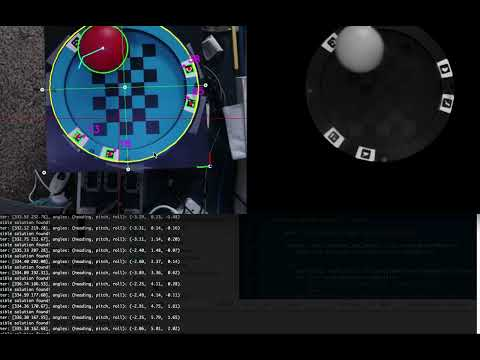

In [5]:
display("Video of above test")
display(YouTubeVideo('Uud9GGdhXBs'))

In [6]:
# convert to degrees
pdg = np.degrees(pitch)
rdg = np.degrees(roll)
pdg, rdg

(array([       -5.6755,        -5.4208,        -5.5911,        -4.3990,
               -6.4410,        -5.7885,        -4.8415,        -4.8558,
               -6.0574,        -6.0288,        -5.8092,        -4.8685,
               -5.9810,        -5.3938,        -4.1667,        -5.7200,
               -6.7673,        -5.7885,        -4.4802,        -4.8622,
               -5.8792,        -5.6691,        -4.7715,        -4.4802,
               -6.0702,        -5.6484,        -6.0176,        -5.6118,
               -5.6834,        -5.3365,        -5.1487,        -4.5948,
               -4.6696,        -5.2394,        -5.3699,        -5.2617,
               -4.8399,        -5.4335,        -6.9392,        -6.6240,
               -5.7153,        -5.0420,        -5.5020,        -5.8537,
               -4.7460,        -6.3726,        -3.2468,        -0.4154,
                1.8589,        -5.3317,        -3.2929,        -1.1650,
               -3.3232,        -6.3073,        -3.3232,        -

In [7]:
# calculate means
pdm = pdg.mean()
rdm = rdg.mean()
pdm, rdm


In [8]:
# square of deviation
pdsod = (pdm - pdg)**2
rdsod = (rdm - rdg)**2

pdsod, rdsod


(array([        0.0619,         0.2535,         0.1110,         2.3265,
                0.2669,         0.0185,         1.1725,         1.1417,
                0.0177,         0.0109,         0.0133,         1.1147,
                0.0032,         0.2815,         3.0893,         0.0417,
                0.7105,         0.0185,         2.0855,         1.1282,
                0.0020,         0.0651,         1.3291,         2.0855,
                0.0213,         0.0761,         0.0087,         0.0977,
                0.0580,         0.3456,         0.6017,         1.7676,
                1.5743,         0.4692,         0.3074,         0.4391,
                1.1760,         0.2409,         1.0299,         0.4896,
                0.0437,         0.7785,         0.1784,         0.0050,
                1.3885,         0.2009,         7.1694,        30.3484,
               60.5791,         0.3512,         6.9243,        22.6511,
                6.7661,         0.1467,         6.7661,         

In [9]:
pdvar = sum(pdsod)/len(pdg)
rdvar = sum(rdsod)/len(rdg)


pdvar, rdvar

In [10]:
cov = sum((pdm - pdg) * (rdm - rdg))/len(pdg)
cov

In [11]:
# with windowed sample
#array([[        8.9883,        17.5858],
#       [       17.5858,        47.9844]])
cvm1 = np.array([
    [pdvar, cov],
    [cov, rdvar]
])
cvm1

array([[       24.1247,         6.7197],
       [        6.7197,        16.6795]])

In [12]:
cvm2 = np.cov(pdg, rdg)
cvm2

array([[       24.1992,         6.7405],
       [        6.7405,        16.7310]])

In [13]:
# well, they're kinda close, fairly close with more data
cvm2 - cvm1

array([[        0.0745,         0.0207],
       [        0.0207,         0.0515]])

In [14]:
# https://github.com/zziz/kalman-filter
# https://en.wikipedia.org/wiki/Kalman_filter#Details
from kalman_filter import KalmanFilter 

In [15]:
dt = .1 # initial
# system matrix
# https://medium.com/@ab.jannatpour/kalman-filter-with-python-code-98641017a2bd
# search for "the kalman filter, state matrix of moving object in 2-d"
F = np.array([
    [1, dt, 0, 0], 
    [0, 1, 0, 0], 
    [0, 0, 1, dt], 
    [0, 0, 0, 0]], np.float32)

#F = np.array([[1, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1]], np.float32)
# observation matrix
H = np.array([[1, 0, 0, 0], [0, 1, 0, 0]], np.float32)
P = np.zeros((4,4), dtype=np.float32)
#Q = np.eye(4, dtype=np.float32)
#P[0:2,0:2] = cvm2
#Q = cvm2
#R = np.eye(2, dtype=np.float32) * 1
R = cvm2/1000
#R = np.array([[0.1, 0], [0, 0.1]])
F, H, R

(array([[        1.0000,         0.1000,         0.0000,         0.0000],
        [        0.0000,         1.0000,         0.0000,         0.0000],
        [        0.0000,         0.0000,         1.0000,         0.1000],
        [        0.0000,         0.0000,         0.0000,         0.0000]],
       dtype=float32),
 array([[        1.0000,         0.0000,         0.0000,         0.0000],
        [        0.0000,         1.0000,         0.0000,         0.0000]],
       dtype=float32),
 array([[        0.0242,         0.0067],
        [        0.0067,         0.0167]]))

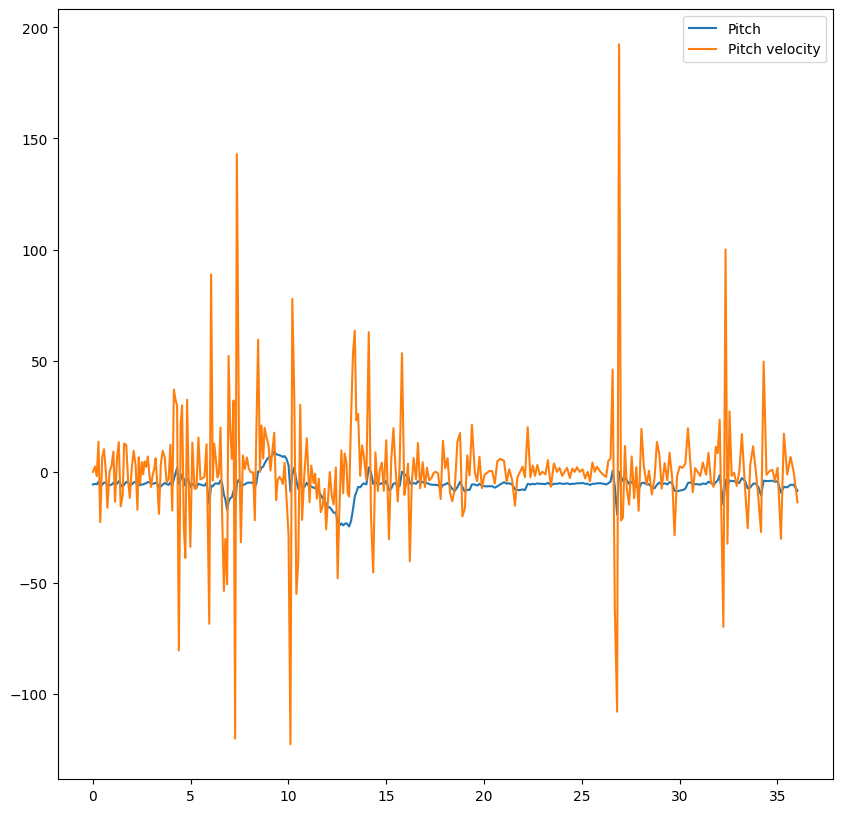

In [16]:
def diff(x, t):
    tl = t[0]
    xl = x[0]
    output = [0]
    dta = [0]
    for i in range(1, len(x)):
        dx = x[i] - xl
        xl = x[i]
        dt = t[i] - tl
        tl = t[i]
        output.append(dx/dt)
        dta.append(dt)
    return np.array(output), np.array(dta)

pdv, _ = diff(pdg, tim)

fig, axis = plt.subplots(figsize=(10, 10))
axis.plot(tim, pdg, label="Pitch")
axis.plot(tim, pdv, label="Pitch velocity")
axis.legend()

In [17]:
slice(0,-1)

slice(0, -1, None)

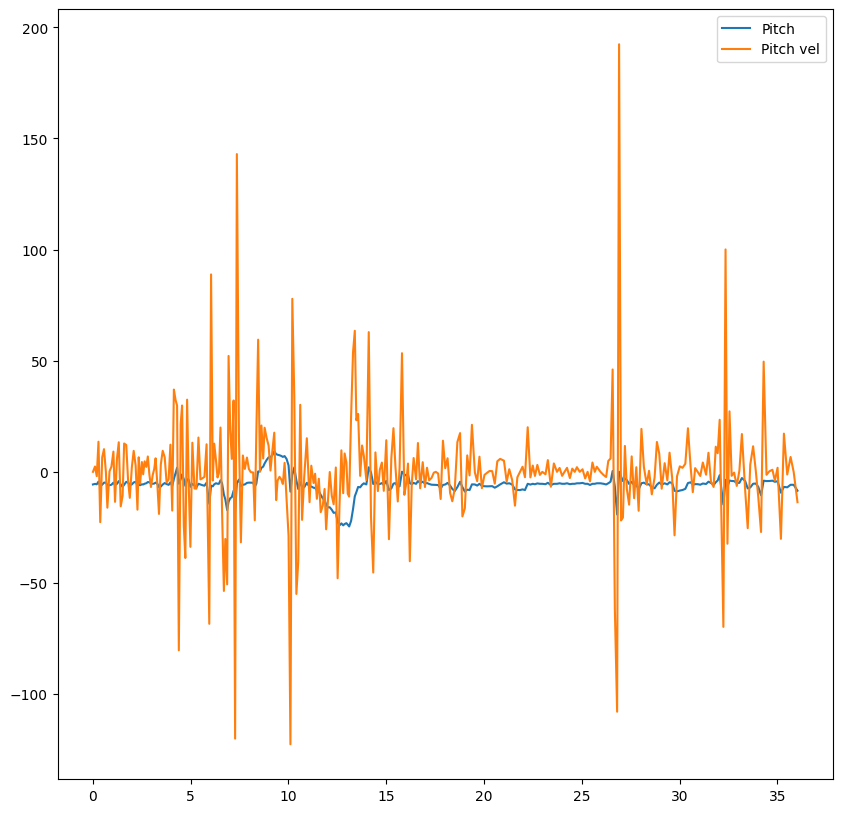

In [56]:
#window = slice(248,285)
#window = slice(30, 70)
window = slice(0, len(tim))
pdw = pdg[window]
rdw = rdg[window]
timw = tim[window]

pdv, dt = diff(pdw, timw)
rdv, dt = diff(rdw, timw)
Q = np.cov((pdw, pdv), (rdw, rdv))/1000


x0 = np.array([pdw[0], pdv[0], rdw[0], rdv[0]]).reshape(4,1)

measurements = np.stack((pdw, rdw), axis=-1)
kf = KalmanFilter(F = F, H = H, R = R, Q = Q, x0 = x0)
predictions = []

for i, z in enumerate (measurements):
    F = np.array([
        [1, dt[i], 0, 0], 
        [0, 1, 0, 0], 
        [0, 0, 1, dt[i]], 
        [0, 0, 0, 0]], np.float32)
    kf.F = F
    predictions.append(np.dot(H,  kf.predict()))
    kf.update(z.reshape(2,1))

pred = np.array(predictions).reshape(2, len(predictions))
#len(predictions)

fig, axis = plt.subplots(figsize=(10, 10))
#axis.set_aspect('equal')
#axis.plot(rdw, pdw, label="Roll/Pitch")
axis.plot(timw, pdw, label="Pitch")
axis.plot(timw, pdv, label="Pitch vel")

#axis.plot(timw, rdw, label="Roll")

#axis.plot(timw, pred[0], label="Predicted Pitch")
#axis.plot(timw, pred[1], label="Predicted Roll")

#axis.set_title("Joystick characterization")
#axis.set_xlabel("Time(ms)")

axis.legend()

In [19]:
moddf = pd.DataFrame()
moddf['time'] = timw
moddf['dt'] = dt
moddf['pitch'] = pdw
moddf['roll'] = rdw
moddf['pdv'] = pdv
moddf['rdv'] = rdv

mod_widget = qgrid.show_grid(moddf, 
                            grid_options={'forceFitColumns': False, 'defaultColumnWidth': 100},
                            show_toolbar=True)
display(mod_widget)



QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

No such comm: 7d452b8739d243a1877c5d48682a477c


In [20]:
def fixlerp(ary, offset):
    v1 = ary[offset-1]
    v2 = ary[offset+1]
    vbad = ary[offset]
    v = (v1+v2)/2.0
    return (v, vbad, abs(v-vbad))

for (v, vbad, dif) in (fixlerp(pdw, 254), fixlerp(rdw, 254), fixlerp(rdw, 50)):
    print(f"Original: {vbad:6.2f}, New: {v:6.2f}  Diff: {dif:6.2f}")


Original: -19.21, New:  -3.29  Diff:  15.92
Original: -39.13, New:   6.48  Diff:  45.62
Original: -29.61, New:   4.72  Diff:  34.32


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

<AxesSubplot:>

array([[       23.4665,         5.6399],
       [        5.6399,        10.1280]])

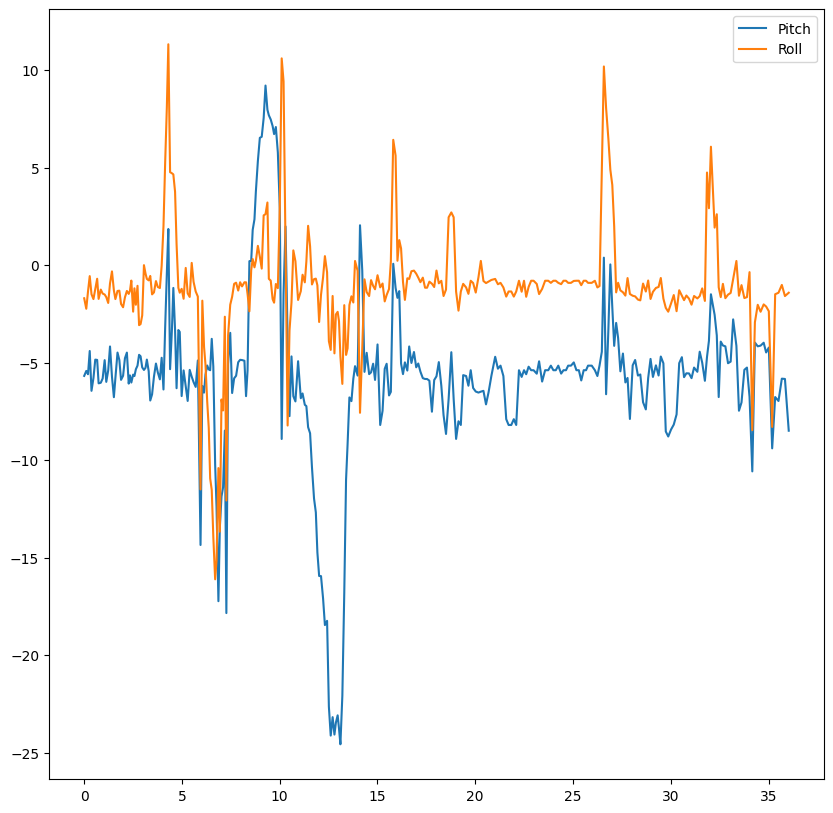

In [55]:
# instead of points, calculate pdv and rdv and throw out any points | | > 100
# try copying last point instead, or lerping last two

pdwf = pdw.copy()
pdwf[254] = fixlerp(pdw, 254)[0]
pdwf[297] = fixlerp(pdw, 297)[0]
rdwf = rdw.copy()
rdwf[254] = fixlerp(rdw, 254)[0]
rdwf[50] = fixlerp(rdw, 50)[0]

pdvf, dt = diff(pdwf, timw)
rdvf, dt = diff(rdwf, timw)

Q = np.cov((pdwf, rdwf))
#Q = np.cov((pdwf, pdvf), (rdwf, rdvf))

mod2df = pd.DataFrame()
mod2df['time'] = timw
mod2df['dt'] = dt
mod2df['pitch'] = pdwf
mod2df['roll'] = rdwf
mod2df['pdv'] = pdvf
mod2df['rdv'] = rdvf

mod2_widget = qgrid.show_grid(mod2df, 
                            grid_options={'forceFitColumns': False, 'defaultColumnWidth': 100},
                            show_toolbar=True)
display(mod2_widget)

fig, axis = plt.subplots(figsize=(10, 10))

axis.plot(timw, pdwf, label="Pitch")
#axis.plot(timw, pdvf, label="Pitch Velocity")
axis.plot(timw, rdwf, label="Roll")

#axis.set_title("Joystick characterization")
#axis.set_xlabel("Time(ms)")
axis.legend()
display(axis)

display(Q)



In [30]:
Q, cvm2, np.abs(Q-cvm2)

(array([[       23.4665,         5.6399],
        [        5.6399,        10.1280]]),
 array([[       24.1992,         6.7405],
        [        6.7405,        16.7310]]),
 array([[        0.7327,         1.1005],
        [        1.1005,         6.6030]]))

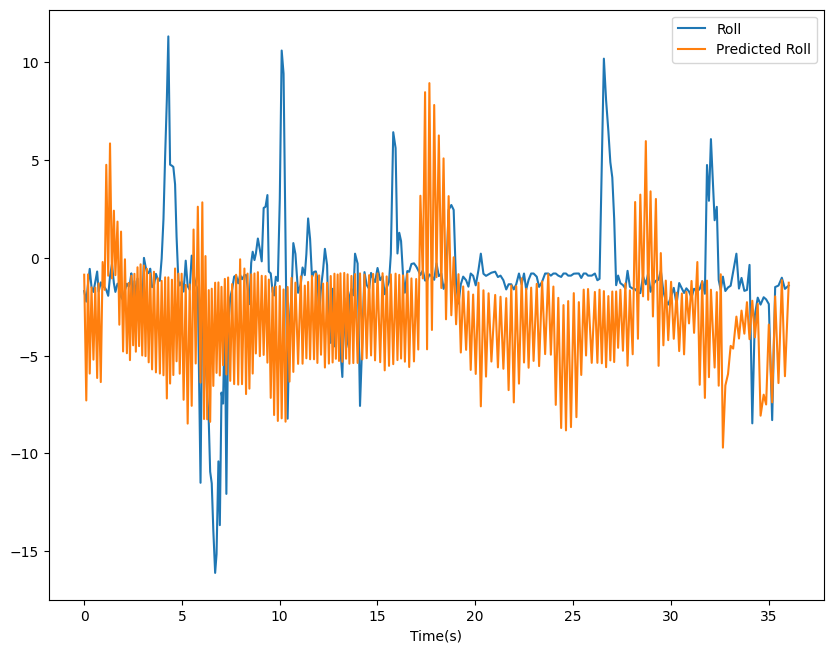

In [52]:
#Q = np.cov((pdwf, pdvf), (rdwf, rdvf))
#Q = np.eye(4) * 20
#R = np.cov(pdwf, rdwf)
#R = np.eye(2) * .1
Q = np.eye(4)
R = np.eye(2)

#H = np.array([[1, 0, 0, 0], [0, 0, 1, 0]], np.float32)
H = np.array([[1, 0, 0, 0], [0, 0, 1, 0]], np.float32)



x0 = np.array([pdwf[0], pdvf[0], rdwf[0], rdvf[0]]).reshape(4,1)

measurements = np.stack((pdwf, rdwf), axis=-1)
kf = KalmanFilter(F = F, H = H, R = R, Q = Q, x0 = x0)
predictions = []

for i, z in enumerate (measurements):
    F = np.array([
        [1, dt[i], 0, 0], 
        [0, 1, 0, 0], 
        [0, 0, 1, dt[i]], 
        [0, 0, 0, 1]], np.float32)
    kf.F = F
    predictions.append(np.dot(H,  kf.predict()))
    kf.update(z.reshape(2,1))

pred = np.array(predictions).reshape(2, len(predictions))
#len(predictions)

fig, axis = plt.subplots(figsize=(10, 10))
axis.set_aspect('equal')
#axis.plot(rdw, pdw, label="Roll/Pitch")
#axis.plot(timw, pdwf, label="Pitch")
#axis.plot(timw, pdvf, label="Pitch vel")

axis.plot(timw, rdwf, label="Roll")

#axis.plot(timw, pred[0], label="Predicted Pitch")
axis.plot(timw, pred[1], label="Predicted Roll")

#axis.set_title("Joystick characterization")
axis.set_xlabel("Time(s)")

axis.legend()

v0: [        0.9659         0.2588]
av: [       -9.4725        -2.5381]


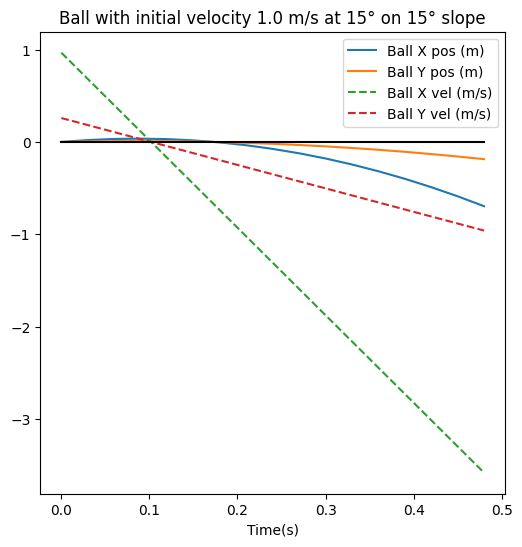

In [22]:
#scipy.constants.g
#sic.g

mm = 1/1000
ds = u'\N{DEGREE SIGN}'
def vecrth(r, θd):
    θr = m.radians(θd)
    return (r * lin.vector(m.cos(θr), m.sin(θr)))

def ballsaq(v0, s0, θ):
    dt = 30.0/1000
    rball = 26*mm
    mball = 13.9 # grams
    v = np.array(v0)
    s = np.array(s0)
    t = 0

    av = vecrth(-sic.g, θ)
    #av = lin.vector(0, -sic.g)
    #avx = -sic.g*m.cos(m.radians(θ))
    #avy = -sic.g*m.sin(m.radians(θ))
    #av = lin.vector(avx, avy)

    print(f"av: {av}")
    va = [v+0]
    sa = [s+0]
    ta = [t+0]
    for i in range(16):
        t += dt
        v += av*dt
        s += v*dt
        va.append(v+0)
        sa.append(s+0)
        ta.append(t+0)
        #logval = [v+0, s+0, t+0]
        #print(f"i: {i} logval: {logval}")
        #out.append(logval)
    return (va, sa, ta)

θ = 15 # degrees
v0 = vecrth(1000*mm, θ)
print(f"v0: {v0}")
s0 = lin.vector(0.0, 0.0)
va, sa, ta = [np.array(v) for v in ballsaq(v0, s0, θ)]
#b[...0]
#b.shape
fig, axis = plt.subplots(figsize=(6, 6))
#axis.set_aspect('equal')
#axis.plot(sa.T[0], sa.T[1], label="Ball Path")

axis.plot(ta, sa.T[0], label="Ball X pos (m)")
axis.plot(ta, sa.T[1], label="Ball Y pos (m)")
axis.plot(ta, va.T[0], '--', label="Ball X vel (m/s)")
axis.plot(ta, va.T[1], '--', label="Ball Y vel (m/s)")
axis.plot([ta[0],ta[-1]], [0, 0], 'k-')

axis.set_title(f"Ball with initial velocity {lin.vmag(v0)} m/s at {θ}{ds} on {θ}{ds} slope")
axis.set_xlabel("Time(s)")
axis.legend()

